# Apprendre à utiliser et visualiser un Dataset Synthetic

A la fin de ce workshop vous saurez:

- Adopter un workflow de base avec GitHub (Develop, Verify, Commit)
- Générer un dataset synthetic de classification 2D avec la librairie sklearn
- visualiser les classes du dataset sur un graphique 2D
- Visualiser les prédictions de notre réseau de neurones sur un graphique 2D
- (bonus) Introduction au refavtoring : vous refactoriserez un code jupyter pour en faire une fonction réutilisable

In [2]:
#importer les librairies utiles

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification


In [11]:
# créer une fonction pour creer un dataset séparable par une ligne droite en 2D

def split_dataset(X, y, train_pct=0.66):
    """ Va séparer les datasets avec respect pour le pourcentage du dataset à mettre dans le train set.
    Warning: La dimension des exemples doit être la première.
    Warning2: Cette fonction doit recevoir des exemples deja mélangée
    TODO: Rajouter un argument pour mélanger les 
    
    :X mes exemples, shape=(m, -1), m -> dimensions des exemples
    :y mes labels, shape=(m, -1), m -> dimensions des exemples
    :train_pct (default=0.66) Optionnal, c'est un pourcentage qui va séparer le de dataset avec train_pct * total_size dans le train set.
    
    return X_train, y_train, X_test, y_test 
    

    >>> X_train, y_train, X_test, y_test = split_dataset(X, y)
    """
    
     # 1ere dimension -> celle des exemples
    total_size = X.shape[0]
    
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    # On récupère `train_pct` % du dataset pour le train set, aussi il faut convertir en entier pour numpy ...
    train_size = int(train_pct * total_size)
    # ... et on met le reste danss le test set
    test_size  = total_size - train_size 
    
    # On met les `train_size` premier exemples/labels dans le train set ...
    X_train, y_train = (X[:train_size], y[:train_size])
    # ... et les test_size derniers exemples/labels dans le test set.
    X_test , y_test  = (X[-test_size:], y[-test_size:])

    # On s'assure que tous les exemples soient présents dans le test set ou le train set.
    assert X_test.shape[0] + X_train.shape[0] == total_size
    assert y_test.shape[0] + y_train.shape[0] == total_size
    
    return X_train, y_train, X_test, y_test 



X, y = make_classification(n_samples=200,
                          n_features=2, n_redundant=0, n_informative=2,
                          random_state=1, n_clusters_per_class=1)
for each in (X, y):
    print(each.shape)

print()

X_train, y_train, X_test, y_test = split_dataset(X, y)

for each in (X_train, y_train, X_test, y_test):
    print(each.shape)

(200, 2)
(200,)

(132, 2)
(132, 1)
(68, 2)
(68, 1)


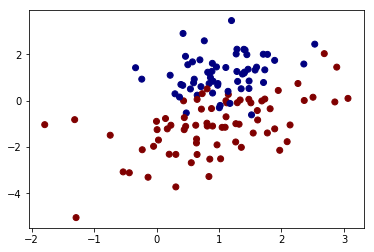

In [20]:
#Refactoriser le plot_dataset
def plot_dataset(X,y):
    """
        Permet d'afficher les classes `y` exemples à 2 features `X`
        Warning: la dimension des exemples doit être la première
        
        
        Soit m, le nombre d'exemples.
        :X, matrices d'exemples(m,2)
        :y, array de label shape(m,1)
    """
    plt.scatter(X_train[:, 0], X_train[:, 1],
           c = y_train[:,0],
            cmap = plt.cm.jet)
    return None

plot_dataset(X_train,y_train)

# #Créer un dataset lineairement séparable
     
   Création d'un dataset de classification en 2D avec la fonction `make classification` du module `sklearn`

In [26]:
SAMPLE_SIZE = 200

#fixer le hasard 
np.random.seed(1)

X,y = make_classification(n_samples= SAMPLE_SIZE,
                         n_features=2,
                         n_informative=2,
                        n_redundant=0,
                         n_classes=2,
                         n_clusters_per_class=1)

#pn split le dataset en set de training et de test.

X_train, y_train, X_test, y_test = split_dataset(X,y)

#On affiche les shapes pour la forme
for each in (X_train,y_train, X_test,y_test):
    print(each.shape)

(132, 2)
(132, 1)
(68, 2)
(68, 1)


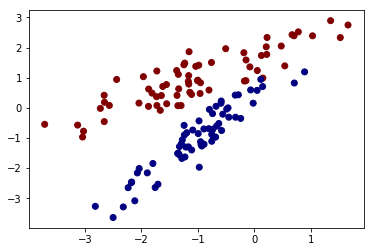

In [24]:
#on affiche le dataset train
plot_dataset(X_train,y_train)

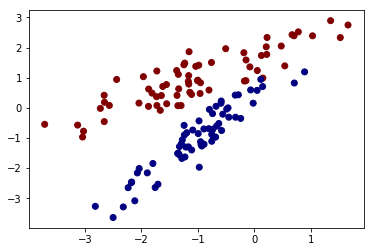

In [25]:
#on affiche le dataset test
plot_dataset(X_test,y_test)

## Créer un dataset "MOONS"
Création d'un dataset de classification en 2D avec la fonction make MOONS du module sklearn

In [27]:
SAMPLE_SIZE = 200

#fixer le hasard 
np.random.seed(1)

X,y = make_moons(n_samples= SAMPLE_SIZE,
                shuffle= True,
                noise= 0.1)
#pn split le dataset en set de training et de test.

X_train, y_train, X_test, y_test = split_dataset(X,y)


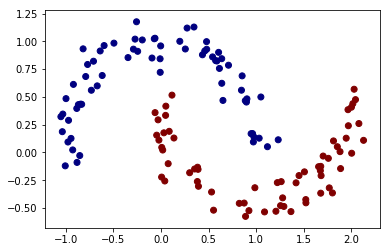

In [28]:
#on affiche le dataset train
plot_dataset(X_train,y_train)

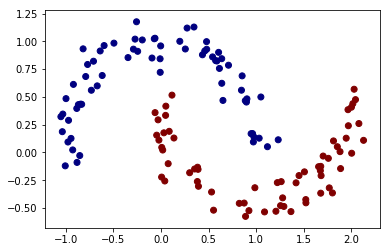

In [29]:
#on affiche le dataset test
plot_dataset(X_test,y_test)

## Créer un dataset "CIRCLE"
Création d'un dataset de classification en 2D avec la fonction make CIRCLE du module sklearn

In [31]:
SAMPLE_SIZE = 200

#fixer le hasard 
np.random.seed(1)

X,y = make_circles(n_samples= SAMPLE_SIZE,
                shuffle= True,
                noise= 0.1)
#pn split le dataset en set de training et de test.

X_train, y_train, X_test, y_test = split_dataset(X,y)


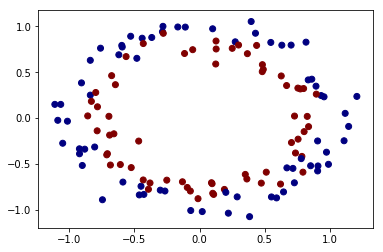

In [32]:
#on affiche le dataset train
plot_dataset(X_train,y_train)

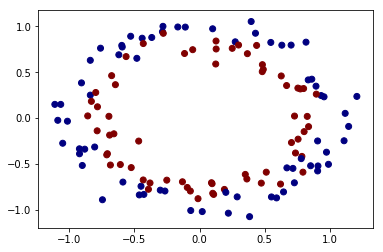

In [33]:
#on affiche le dataset test
plot_dataset(X_test,y_test)

# Visualiser les predictions d'un ANN

**ici on va seulement coder une forward pass, sans entrainer le réseau**

In [35]:
#On visualise les shapes et les inputs

X_train.shape, y_train.shape

((132, 2), (132, 1))

In [37]:
#Créer les paramètres  de notre réseau de neurones

n_neuron_1 = 10
n_x_features = X_train.shape[1] # Pour être générique, mais on sait tous que c'est 2 vu qu'on est en 2D

# On force le destin
np.random.seed(777)

# On init les poids de la première couche
W1 = np.random.randn(n_neuron_1, n_x_features)
b1 = np.zeros((n_neuron_1, 1))

print(W1.shape, b1.shape)

# On init les poids de la seconde couche
n_neuron_2 = 1
W2 = np.random.randn(n_neuron_2, n_neuron_1)
b2 = np.zeros((n_neuron_2, 1))

print(W2.shape, b2.shape)

(10, 2) (10, 1)
(1, 10) (1, 1)


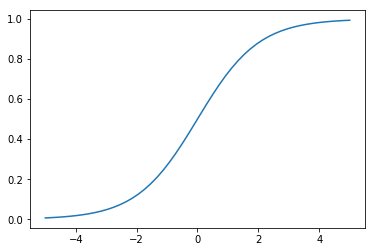

In [38]:
# On définit la fonction Sigmoid 

def sigmoid(Z):
    eZ = np.exp(-Z)
    return 1. / (1. + eZ)

# Visualiser la fonction sigmoid

ligne = np.linspace(-5, 5)
sig = sigmoid(ligne)
plt.plot(ligne, sig)